In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


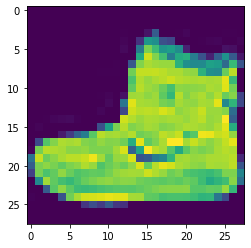

In [4]:
plt.imshow(x_train[0])

In [5]:
# shaping data vectors

x_train = x_train.reshape(-1, 28, 28, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_test = y_test.reshape(-1, 1)

# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

# normalizing data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### model 1 : 

In [6]:
def createModel():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape = (28, 28, 1), padding = 'valid', activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape = (28, 28, 1), padding = 'valid', activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(filters =64, kernel_size = (3,3), input_shape = (12, 12, 32), padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(32, activation='relu', activity_regularizer = tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(10, activation = 'softmax',  activity_regularizer = tf.keras.regularizers.l2(0.01)))
    
    model.summary()

    return model

In [7]:
def trainModel(model):
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    keras_history = model.fit(x_train, y_train, epochs = 30, validation_split = 0.2)
    return keras_history

In [8]:
def getModelPredictions(model, X_test):
    predictions = np.argmax(model.predict(X_test), axis = 1)
    return predictions


In [9]:
tf.keras.backend.clear_session()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
model = createModel()
keras_history = trainModel(model)
y_pred = getModelPredictions(model, x_test)

(60000, 28, 28, 1) (60000, 1) (10000, 28, 28, 1) (10000, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
______________________________________________________________

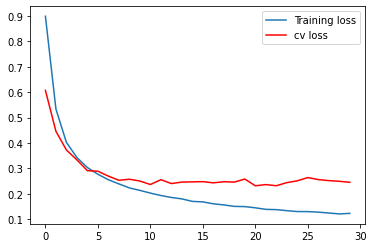

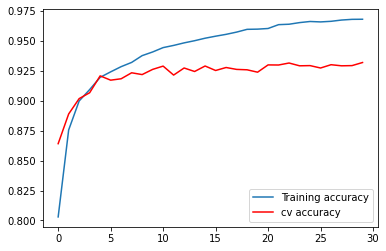

In [10]:
plt.plot(keras_history.history['loss'], label='Training loss')
plt.plot(keras_history.history['val_loss'], color='red', label='cv loss')
plt.legend()
plt.figure()
plt.plot(keras_history.history['accuracy'], label='Training accuracy')
plt.plot(keras_history.history['val_accuracy'], color='red', label='cv accuracy')
plt.legend()

In [11]:
print(accuracy_score(y_test, y_pred))

0.9291
